# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

632

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Build partial query URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
numCity = 0
query_url = f"{url}appid={weather_api_key}&units={units}&q="
query_url
# Setup lists to capture data through API calls, which will be added to the dataframe later
city_list = []
geo_lat_list = []
geo_long_list = []
max_temp_list = []
humidity_list = []
cloudiness_list = []
windspeed_list = []
country_list = []
dates_list = []

#Loop through the cities list and append data to the appropriate lists
print(f"Beginning Data Retrieval")
print("-----------------------------")

for city in cities:
    try:
        response = requests.get(query_url + city).json()
        geo_lat_list.append(response["coord"]["lat"])
        geo_long_list.append(response["coord"]["lon"])
        max_temp_list.append(response["main"]["temp_max"])
        humidity_list.append(response["main"]["humidity"])
        cloudiness_list.append(response["clouds"]["all"])
        windspeed_list.append(response["wind"]["speed"])
        country_list.append(response["sys"]["country"])
        dates_list.append(response["dt"])
        city_list.append(city)
        numCity += 1
        print(f"Processing Record {numCity} | {city}")
    except:
        print(f"City ({city}) not found. Skipping...")
        pass

print("-----------------------------")
print(f"Data Retrieval Complete")
print("-----------------------------")


Beginning Data Retrieval
-----------------------------
Processing Record 1 | carbonia
Processing Record 2 | ushuaia
Processing Record 3 | qaanaaq
Processing Record 4 | sechura
City (illoqqortoormiut) not found. Skipping...
Processing Record 5 | cape town
Processing Record 6 | georgetown
Processing Record 7 | rikitea
Processing Record 8 | menongue
Processing Record 9 | amroli
Processing Record 10 | flinders
Processing Record 11 | kloulklubed
Processing Record 12 | darab
Processing Record 13 | mataura
Processing Record 14 | mwinilunga
Processing Record 15 | saskylakh
Processing Record 16 | ode
Processing Record 17 | avarua
Processing Record 18 | portland
Processing Record 19 | doha
Processing Record 20 | atuona
Processing Record 21 | port alfred
Processing Record 22 | joensuu
Processing Record 23 | kieta
City (amderma) not found. Skipping...
Processing Record 24 | puerto ayora
City (rungata) not found. Skipping...
Processing Record 25 | albany
City (palabuhanratu) not found. Skipping...


Processing Record 224 | sladkovo
Processing Record 225 | kangaatsiaq
City (falealupo) not found. Skipping...
Processing Record 226 | san giovanni rotondo
Processing Record 227 | miyako
Processing Record 228 | pevek
Processing Record 229 | veraval
Processing Record 230 | fortuna
Processing Record 231 | sisimiut
Processing Record 232 | lahaina
Processing Record 233 | qaqortoq
Processing Record 234 | caborca
Processing Record 235 | pinhal novo
Processing Record 236 | inuvik
Processing Record 237 | san diego
Processing Record 238 | baruun-urt
Processing Record 239 | buriti bravo
Processing Record 240 | shakawe
Processing Record 241 | aksu
City (mahadday weyne) not found. Skipping...
Processing Record 242 | trapani
Processing Record 243 | plattsburgh
Processing Record 244 | damietta
Processing Record 245 | akdagmadeni
Processing Record 246 | kahului
City (vaitupu) not found. Skipping...
City (sentyabrskiy) not found. Skipping...
City (attawapiskat) not found. Skipping...
Processing Record 2

Processing Record 448 | opuwo
Processing Record 449 | nakhon phanom
Processing Record 450 | kununurra
Processing Record 451 | asosa
Processing Record 452 | miedzyrzecz
Processing Record 453 | iquitos
Processing Record 454 | sitka
Processing Record 455 | bayburt
Processing Record 456 | nishihara
Processing Record 457 | shelburne
Processing Record 458 | krasnovishersk
Processing Record 459 | rosarito
Processing Record 460 | sao raimundo das mangabeiras
Processing Record 461 | yelets
Processing Record 462 | fort nelson
Processing Record 463 | port hedland
Processing Record 464 | lokosovo
Processing Record 465 | antalaha
Processing Record 466 | bundaberg
Processing Record 467 | guiong
Processing Record 468 | rumphi
Processing Record 469 | urucurituba
Processing Record 470 | skjervoy
City (gangotri) not found. Skipping...
Processing Record 471 | kailua
Processing Record 472 | sangueya
City (falkoping) not found. Skipping...
Processing Record 473 | tongzi
Processing Record 474 | geraldton
Pr

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
temperature_by_city_df = pd.DataFrame({
    "City" : city_list,
    "Lat" : geo_lat_list,
    "Lng" : geo_long_list,
    "Max Temp" : max_temp_list,
    "Humidity" : humidity_list,
    "Cloudiness" : cloudiness_list,
    "Wind Speed" : windspeed_list,
    "Country" : country_list,
    "Date" : dates_list,
})


temperature_by_city_df.to_csv(output_data_file)
temperature_by_city_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,carbonia,39.1672,8.5222,60.80,88,0,3.44,IT,1619382376
1,ushuaia,-54.8000,-68.3000,55.40,50,20,16.11,AR,1619382352
2,qaanaaq,77.4840,-69.3632,31.48,74,27,4.07,GL,1619382377
3,sechura,-5.5569,-80.8222,80.44,58,62,13.42,PE,1619382377
4,cape town,-33.9258,18.4232,62.01,94,20,8.05,ZA,1619382377


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [5]:
humidity_over_100_df = temperature_by_city_df.loc[temperature_by_city_df["Humidity"]>100]
humidity_over_100_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [6]:
#  Get the indices of cities that have humidity over 100%.


In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

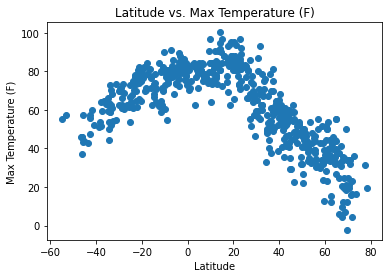

As the Scatter Plot clearly shows, the highest temperatures are closer to the equater.
Temperatures are far lower as we move away from the equater. .


In [8]:
#Set x-axis and y-axis
x_axis = temperature_by_city_df["Lat"]
y_axis = temperature_by_city_df["Max Temp"]

#Plot data
plt.scatter(x_axis, y_axis)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Latitude vs. Max Temperature (F)")
plt.savefig("output_data/maxtemp_vs_lat.png")
plt.show()

print(f"As the Scatter Plot clearly shows, the highest temperatures are closer to the equater.")
print(f"Temperatures are far lower as we move away from the equater. .")

## Latitude vs. Humidity Plot

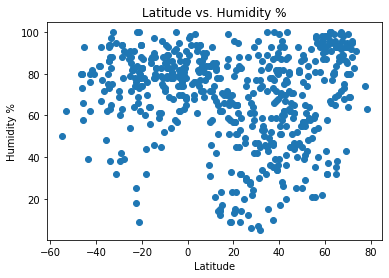

Humidity % tends to be the lowest closer to the equator and the highest away from the equator.
However, there are cities closest to the equator that share similiar humidity levels as cities that are farther from the equator.


In [9]:
#Set x-axis and y-axis
x_axis = temperature_by_city_df["Lat"]
y_axis = temperature_by_city_df["Humidity"]

#Plot data
plt.scatter(x_axis, y_axis)
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.title("Latitude vs. Humidity %")
plt.savefig("output_data/humidity_vs_lat.png")
plt.show()

print(f"Humidity % tends to be the lowest closer to the equator and the highest away from the equator.")
print(f"However, there are cities closest to the equator that share similiar humidity levels as cities that are farther from the equator.")

## Latitude vs. Cloudiness Plot

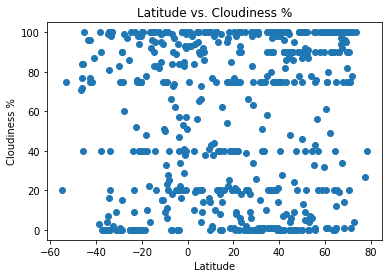

There seems to be no correlation between cloudiness and latitude.


In [10]:
#Set x-axis and y-axis
x_axis = temperature_by_city_df["Lat"]
y_axis = temperature_by_city_df["Cloudiness"]

#Plot data
plt.scatter(x_axis, y_axis)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.title("Latitude vs. Cloudiness %")
plt.savefig("output_data/cloudiness_vs_lat.png")
plt.show()

print(f"There seems to be no correlation between cloudiness and latitude.")

## Latitude vs. Wind Speed Plot

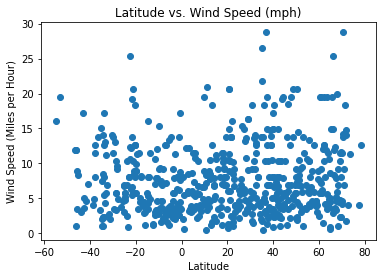

There is less Wind Speed closer to the equator. The highest windspeeds are found from the -25 to -40 range, and from 25 to 45 range.
Windspeed is greatly reduced as we move away from the equator on either direction.


In [11]:
#Set x-axis and y-axis
x_axis = temperature_by_city_df["Lat"]
y_axis = temperature_by_city_df["Wind Speed"]

#Plot data
plt.scatter(x_axis, y_axis)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (Miles per Hour)")
plt.title("Latitude vs. Wind Speed (mph)")
plt.savefig("output_data/windspeed_vs_lat.png")
plt.show()

print(f"There is less Wind Speed closer to the equator. The highest windspeeds are found from the -25 to -40 range, and from 25 to 45 range.")
print(f"Windspeed is greatly reduced as we move away from the equator on either direction.")

## Linear Regression

In [12]:
#Go through dataframe and create 2 new dataframes for Northern and Southern hemisfpheres
northern_hemisphere_df = temperature_by_city_df.loc[temperature_by_city_df["Lat"] >= 0]
southern_hemisphere_df = temperature_by_city_df.loc[temperature_by_city_df["Lat"] < 0]

#We're going to repeat the same code for linear regressions. Utilize a function instead
def linearRegressionFunc(x_axis, y_axis):
    
    correlation_coeff = st.pearsonr(x_axis, y_axis)
    print(f"The correlation coefficient: {round(correlation_coeff[0],2)}.")


    #Linear Regression
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
    regression_value = slope * x_axis + intercept
    line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # line_equation

    #Replot scatter plot with linear regression information
    plt.scatter(x_axis, y_axis)
    plt.plot(x_axis, regression_value, "r-")
    
    return line_equation
    

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation coefficient: -0.88.


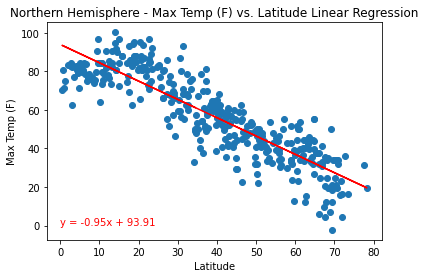

The linear regression shows that there is a negative correlation coefficient present in the northern hemisphere.
Temperatures drop as we move away from the equator.
There is a strong relation between temperature and latitude.


In [13]:
x_axis = northern_hemisphere_df["Lat"]
y_axis = northern_hemisphere_df["Max Temp"]
line_equation = linearRegressionFunc(x_axis, y_axis)

plt.annotate(line_equation, (0, 0), color="red")
plt.title("Northern Hemisphere - Max Temp (F) vs. Latitude Linear Regression")
plt.ylabel("Max Temp (F)")
plt.xlabel("Latitude")
plt.savefig("output_data/northern_maxtemp_vs_lat.png")
plt.show()

print(f"The linear regression shows that there is a negative correlation coefficient present in the northern hemisphere.")
print(f"Temperatures drop as we move away from the equator.")
print(f"There is a strong relation between temperature and latitude.")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation coefficient: 0.79.


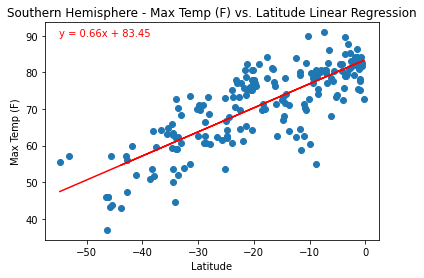

The linear regression shows that there is a positive correlation coefficient present in the southern hemisphere.
Temperatures increase as we move closer to the equator.
There is a strong relation between temperature and latitude.
Both Southern and Northern have fairly strong relationship.


In [14]:
x_axis = southern_hemisphere_df["Lat"]
y_axis = southern_hemisphere_df["Max Temp"]
line_equation = linearRegressionFunc(x_axis, y_axis)

plt.annotate(line_equation, (-55, 90), color="red")
plt.title("Southern Hemisphere - Max Temp (F) vs. Latitude Linear Regression")
plt.ylabel("Max Temp (F)")
plt.xlabel("Latitude")
plt.savefig("output_data/southern_maxtemp_vs_lat.png")
plt.show()

print(f"The linear regression shows that there is a positive correlation coefficient present in the southern hemisphere.")
print(f"Temperatures increase as we move closer to the equator.")
print(f"There is a strong relation between temperature and latitude.")
print(f"Both Southern and Northern have fairly strong relationship.")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation coefficient: 0.18.
There is a weak relationship between Humidity and Latitude, even though humidity rises as we move away from the equator.
The correlation coefficient is small indicating almost no relationship.


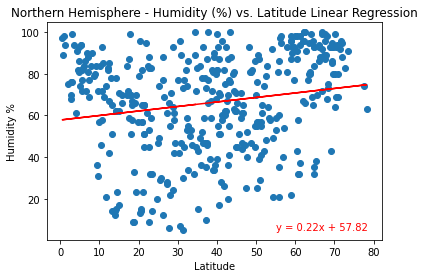

In [15]:
x_axis = northern_hemisphere_df["Lat"]
y_axis = northern_hemisphere_df["Humidity"]
line_equation = linearRegressionFunc(x_axis, y_axis)

plt.annotate(line_equation, (55, 5), color="red")
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.ylabel("Humidity %")
plt.xlabel("Latitude")
plt.savefig("output_data/northern_humidity_vs_lat.png")

print(f"There is a weak relationship between Humidity and Latitude, even though humidity rises as we move away from the equator.")
print(f"The correlation coefficient is small indicating almost no relationship.")

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation coefficient: 0.11.


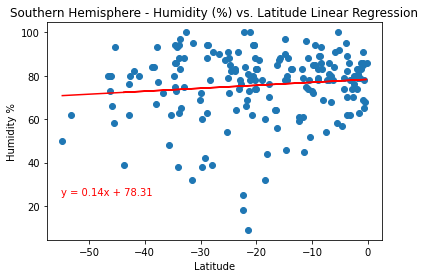

There is almost no relationship between Humidity and Latitude in the Southern Hemisphere.
The correlation coefficient is close to 0 indicating no relationship.


In [16]:
x_axis = southern_hemisphere_df["Lat"]
y_axis = southern_hemisphere_df["Humidity"]
line_equation = linearRegressionFunc(x_axis, y_axis)

plt.annotate(line_equation, (-55, 25), color="red")
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.ylabel("Humidity %")
plt.xlabel("Latitude")
plt.savefig("output_data/southern_humidity_vs_lat.png")
plt.show()

print(f"There is almost no relationship between Humidity and Latitude in the Southern Hemisphere.")
print(f"The correlation coefficient is close to 0 indicating no relationship.")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation coefficient: 0.13.


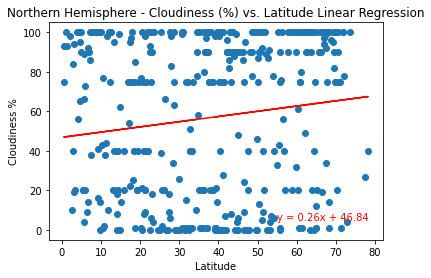

There is almost no relationship between Cloudiness and Latitude in the Northern Hemisphere.
The correlation coefficient is close to 0 indicating no relationship.


In [17]:
x_axis = northern_hemisphere_df["Lat"]
y_axis = northern_hemisphere_df["Cloudiness"]
line_equation = linearRegressionFunc(x_axis, y_axis)

plt.annotate(line_equation, (55, 5), color="red")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.ylabel("Cloudiness %")
plt.xlabel("Latitude")
plt.savefig("output_data/northern_cloudiness_vs_lat.png")
plt.show()

print(f"There is almost no relationship between Cloudiness and Latitude in the Northern Hemisphere.")
print(f"The correlation coefficient is close to 0 indicating no relationship.")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation coefficient: 0.0.


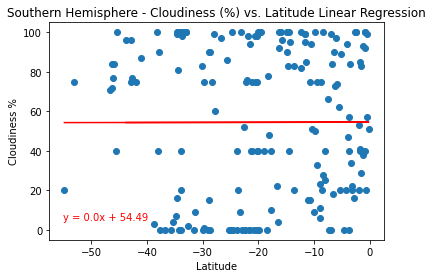

There is almost no relationship between Cloudiness and Latitude in the Southern Hemisphere.
Even though there exists an increase in cloudiness as we move closer to the equator, 
the correlation coefficient is close to 0 indicating no relationship.


In [18]:
x_axis = southern_hemisphere_df["Lat"]
y_axis = southern_hemisphere_df["Cloudiness"]
line_equation = linearRegressionFunc(x_axis, y_axis)

plt.annotate(line_equation, (-55, 5), color="red")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.ylabel("Cloudiness %")
plt.xlabel("Latitude")
plt.savefig("output_data/southern_cloudiness_vs_lat.png")
plt.show()

print(f"There is almost no relationship between Cloudiness and Latitude in the Southern Hemisphere.")
print(f"Even though there exists an increase in cloudiness as we move closer to the equator, ")
print(f"the correlation coefficient is close to 0 indicating no relationship.")


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation coefficient: 0.11.


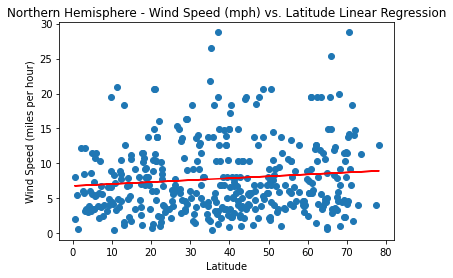

There is no relationship between Wind Speed and Latitude in the Northern Hemisphere.
the correlation coefficient is close to 0 indicating no relationship.


In [19]:
x_axis = northern_hemisphere_df["Lat"]
y_axis = northern_hemisphere_df["Wind Speed"]
line_equation = linearRegressionFunc(x_axis, y_axis)

plt.annotate(line_equation, (55, 33), color="red")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.ylabel("Wind Speed (miles per hour)")
plt.xlabel("Latitude")
plt.savefig("output_data/northern_windspeed_vs_lat.png")
plt.show()

print(f"There is no relationship between Wind Speed and Latitude in the Northern Hemisphere.")
print(f"the correlation coefficient is close to 0 indicating no relationship.")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation coefficient: -0.23.


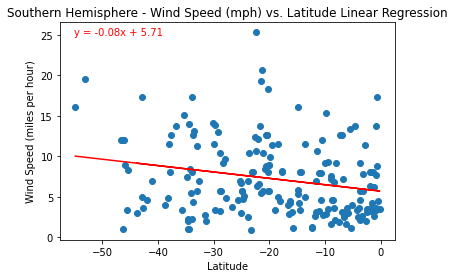

There is no relationship between Wind Speed and Latitude in the Southern Hemisphere.
the correlation coefficient is close to 0 indicating no relationship.


In [20]:
x_axis = southern_hemisphere_df["Lat"]
y_axis = southern_hemisphere_df["Wind Speed"]
line_equation = linearRegressionFunc(x_axis, y_axis)

plt.annotate(line_equation, (-55, 25), color="red")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.ylabel("Wind Speed (miles per hour)")
plt.xlabel("Latitude")
plt.savefig("output_data/southern_windspeed_vs_lat.png")
plt.show()

print(f"There is no relationship between Wind Speed and Latitude in the Southern Hemisphere.")
print(f"the correlation coefficient is close to 0 indicating no relationship.")